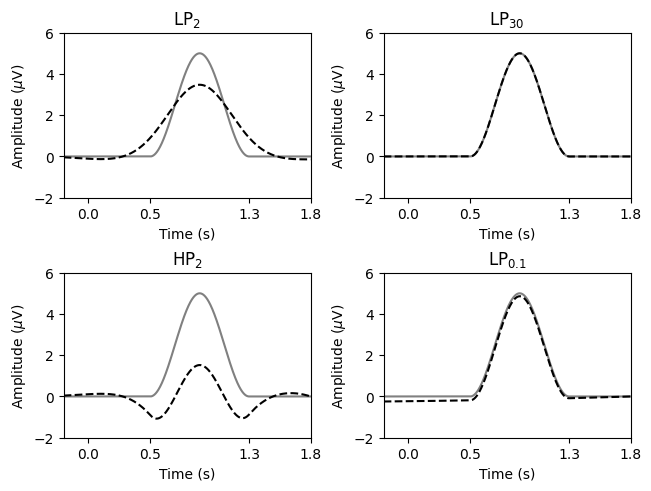

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal

import mne
from mne.fixes import minimum_phase
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter

sfreq = 1000.0
# f_p = 40.0
# # limits for plotting
# flim = (1.0, sfreq / 2.0)  # frequencies
# dlim = (-0.2, 0.2)  # delays

x = np.zeros(int(2 * sfreq))
t = np.arange(0, len(x)) / sfreq - 0.2
onset = np.where(t >= 0.5)[0][0]
cos_t = np.arange(0, int(sfreq * 0.8)) / sfreq
sig = 2.5 - 2.5 * np.cos(2 * np.pi * (1.0 / 0.8) * cos_t)
x[onset : onset + len(sig)] = sig

iir_lp_30 = signal.iirfilter(2, 30.0 / sfreq, btype="lowpass")
iir_hp_p1 = signal.iirfilter(2, 0.1 / sfreq, btype="highpass")
iir_lp_2 = signal.iirfilter(2, 2.0 / sfreq, btype="lowpass")
iir_hp_2 = signal.iirfilter(2, 2.0 / sfreq, btype="highpass")
x_lp_30 = signal.filtfilt(iir_lp_30[0], iir_lp_30[1], x, padlen=0)
x_hp_p1 = signal.filtfilt(iir_hp_p1[0], iir_hp_p1[1], x, padlen=0)
x_lp_2 = signal.filtfilt(iir_lp_2[0], iir_lp_2[1], x, padlen=0)
x_hp_2 = signal.filtfilt(iir_hp_2[0], iir_hp_2[1], x, padlen=0)

xlim = t[[0, -1]]
ylim = [-2, 6]
xlabel = "Time (s)"
ylabel = r"Amplitude ($\mu$V)"
tticks = [0, 0.5, 1.3, t[-1]]
axes = plt.subplots(2, 2, layout="constrained")[1].ravel()
for ax, x_f, title in zip(
    axes,
    [x_lp_2, x_lp_30, x_hp_2, x_hp_p1],
    ["LP$_2$", "LP$_{30}$", "HP$_2$", "LP$_{0.1}$"],
):
    ax.plot(t, x, color="0.5")
    ax.plot(t, x_f, color="k", linestyle="--")
    ax.set(
        ylim=ylim, xlim=xlim, xticks=tticks, title=title, xlabel=xlabel, ylabel=ylabel
    )

plt.show()